# Defining the nature and scope of the project

We are given a database that shows various features of cars made by US, Europe and Japan based companies over the span of 10 years. We will explore how data visualization clearly differentiates the three brands with the given features. Then we will apply different classifier models and try to find out the best model with best parameter. Finally training and evaluating using the best one. 

## Importing Necessary Libraries

In [1]:
from time import time
start=time()

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Loading and exploring data

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
d = df.drop_duplicates(subset ="brand",)
d

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [4]:
df.value_counts("brand")

brand
 US.        162
 Japan.      51
 Europe.     48
dtype: int64

## Data Visualization

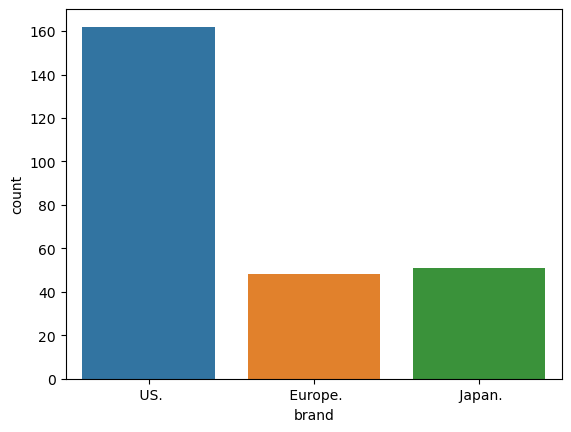

In [5]:
sns.countplot(x='brand', data=df, )
plt.show()

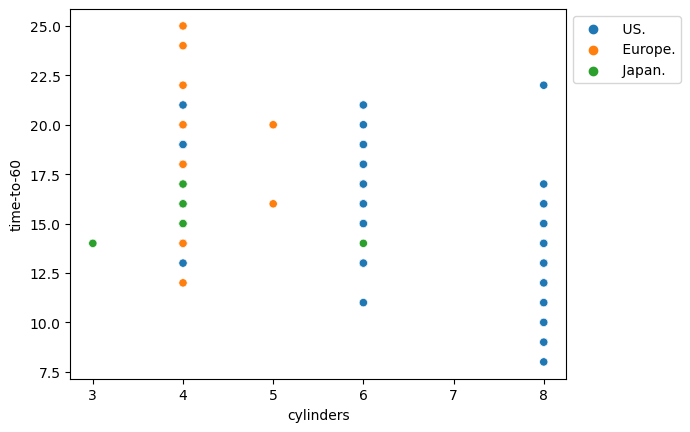

In [6]:
sns.scatterplot(y='time-to-60', x='cylinders',
                hue='brand', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

<AxesSubplot:xlabel='year', ylabel='mpg'>

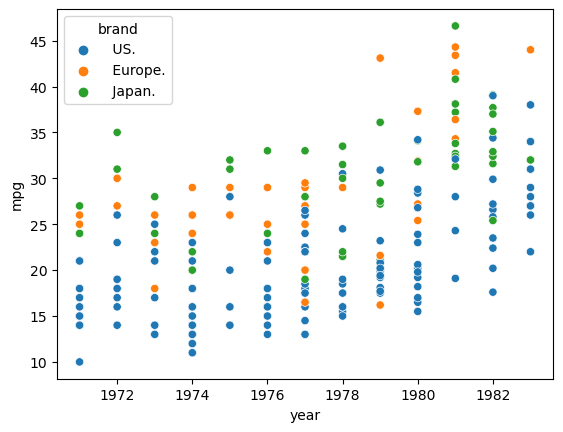

In [7]:
sns.scatterplot(x='year', y='mpg',
                hue='brand', data=df, )

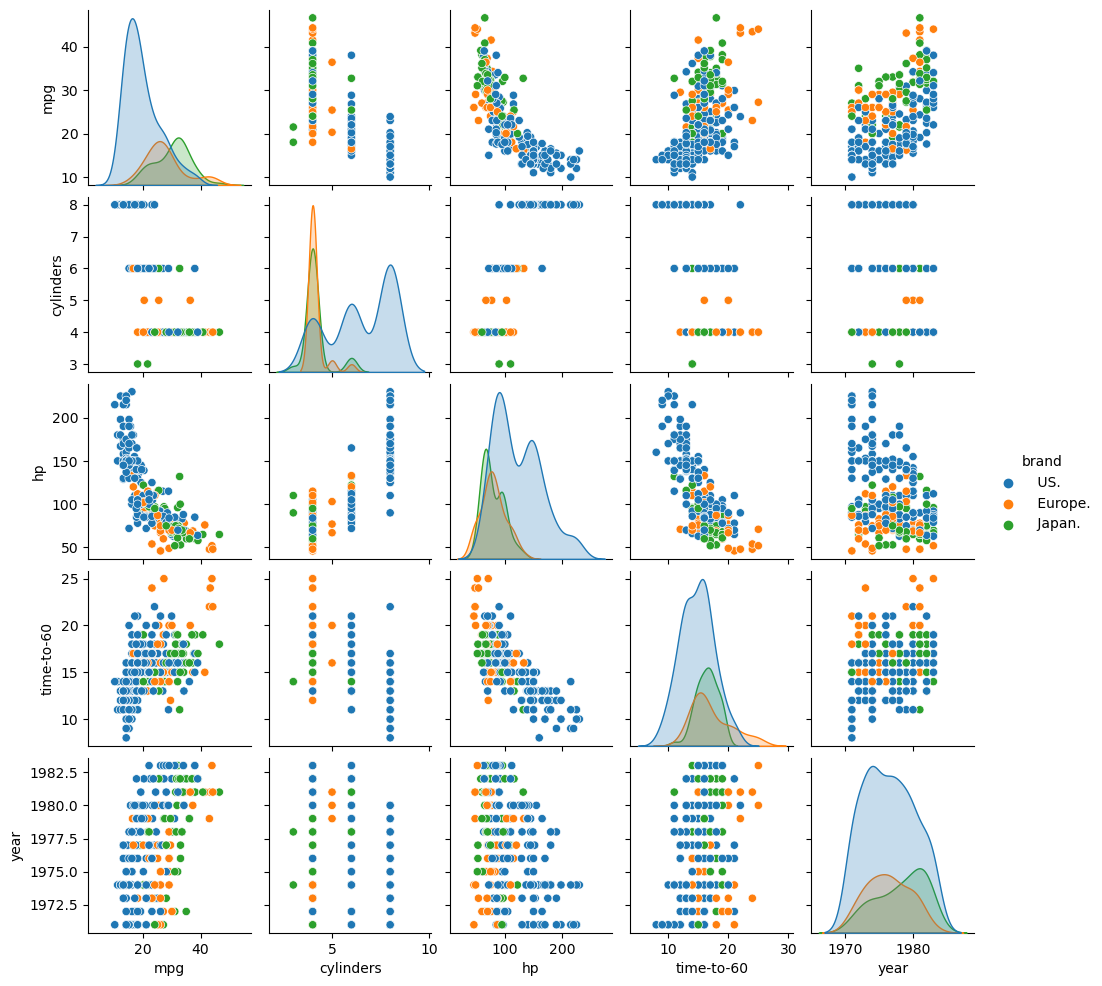

In [8]:
sns.pairplot(df, 
             hue='brand', height=2)

** Observations **

1) US cars mostly have 6 or 8 cylinders and thus is more powerful in terms of reaching 60 in the shortest time.

2) Generally as the years progressed developments in car industries has significantly improved mile per gallon in all brands.

3) We can see many types of relationships from the pair-plot such as there is a nagative corelation between hp and mpg. When hp increases mpg tends to decrease. Such information can be gathered about any other pair.

## Cleaning and Preprocessing data

In [9]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [10]:
df.head(50)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


**Findings**
1) We can see the dataset has no missing value but on closer inspection we can see that it has empty values in the columns weightlbs and cubicinches. So we need to drop those 2 columns.


In [11]:
le = preprocessing.LabelEncoder()
df['brand']= le.fit_transform(df['brand'])
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,2
257,36.1,4,91,60,1800,16,1979,1
258,22.0,6,232,112,2835,15,1983,2
259,18.0,6,232,100,3288,16,1972,2


## Splitting the Data

In [12]:
X=df.drop(['brand','cubicinches','weightlbs'], axis=1)
y=df['brand']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 5), (79, 5), (182,), (79,))

In [14]:
X

,mpg,cylinders,hp,time-to-60,year
0,14.0,8,165,12,1972
1,31.9,4,71,14,1980
2,17.0,8,140,11,1971
3,15.0,8,150,10,1971
4,30.5,4,63,17,1978
...,...,...,...,...,...
256,17.0,8,130,15,1980
257,36.1,4,60,16,1979
258,22.0,6,112,15,1983
259,18.0,6,100,16,1972


In [15]:
y

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int32

## Scaling the Data

In [16]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Function to compare different models

In [17]:

# List of models to try
models = [KNeighborsClassifier(),
          GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
         ]

# Hyperparameters to try
param_grid = {'KNeighborsClassifier': {'n_neighbors': [10,12,14,16,18,20,22,24,26,28,30]},
              'GaussianNB': {'var_smoothing': [.00001,.0001,.001,0.01,0.1,1,10]},
              'LogisticRegression':{'C': [.00001,.0001,.001,0.01,0.1,1,10]},
              'RandomForestClassifier': {'n_estimators': [100, 200], 'max_depth': [80,90],'max_features': [2, 3]},
              'DecisionTreeClassifier': {'max_depth': [3, 5, 70,85]},
              'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5, 1]}
             }


# Dataframe to store results
metrics = {'Model': [], 'ATR': [], 'ATS': [], 'F1_TR': [], 'F1_TS': [], 'B_P': []}

# Looping through models
for i, model in enumerate(models):
    mst = time()
    
    # Get model name
    model_name = str(model).replace("()","")
    
    # Perform grid search with cross-validation
    gs = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs =-1)
    gs.fit(X_train, y_train)
    
    # Get best parameters
    best_params = gs.best_params_
    print(f"Best Paramenters for {model_name} is {best_params}")
    

    # Fit model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # Append in a list for future use
    # basic_models.append(model)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_pred_train,y_train)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_train = f1_score(y_pred_train,y_train,average='micro' )
    f1_test = f1_score(y_pred_test,y_test,average='micro')
    
    # Append to DataFrame
    metrics['Model'].append(model_name)    
    metrics['ATR'].append(f"{accuracy_train:.3f}")
    metrics['ATS'].append(f"{accuracy_test:.3f}")
    metrics['F1_TR'].append(f"{f1_train:.3f}")
    metrics['F1_TS'].append(f"{f1_test:.3f}")
    metrics['B_P'].append(best_params)
    
    metrics_df = pd.DataFrame(metrics)
    

    print(f"{model.__class__.__name__}: accuracy_train={accuracy_train:.4f} accuracy_test={accuracy_test:.4f} f1_train={f1_train:.4f}, f1_test = {f1_test:.4f}")
    met = time()
    mrt = met-mst
    minute=int(mrt/60)
    second=mrt%60
    if minute>=60:
        hour=int(minute/60)
        minute=minute%60
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
    else:
        print(f"Total execution time for {model.__class__.__name__} is : {mrt}'.")
        print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")
    print()


Best Paramenters for KNeighborsClassifier is {'n_neighbors': 10}
KNeighborsClassifier: accuracy_train=0.8132 accuracy_test=0.7342 f1_train=0.8132, f1_test = 0.7342

Best Paramenters for GaussianNB is {'var_smoothing': 0.01}
GaussianNB: accuracy_train=0.7253 accuracy_test=0.7342 f1_train=0.7253, f1_test = 0.7342

Best Paramenters for LogisticRegression is {'C': 10}
LogisticRegression: accuracy_train=0.7473 accuracy_test=0.7468 f1_train=0.7473, f1_test = 0.7468

Best Paramenters for RandomForestClassifier is {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
RandomForestClassifier: accuracy_train=1.0000 accuracy_test=0.8101 f1_train=1.0000, f1_test = 0.8101

Best Paramenters for DecisionTreeClassifier is {'max_depth': 5}
DecisionTreeClassifier: accuracy_train=0.8846 accuracy_test=0.7722 f1_train=0.8846, f1_test = 0.7722

Best Paramenters for GradientBoostingClassifier is {'learning_rate': 1, 'n_estimators': 200}
GradientBoostingClassifier: accuracy_train=1.0000 accuracy_test=0.759

## [10] Representing the findings in a table and sorting out the best model with parameters

In [18]:
# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.add_column("Model Name", metrics['Model'])
table.add_column("Accu_train",metrics['ATR'])
table.add_column("Accu_test",metrics['ATS'])
table.add_column("F1_train",metrics['F1_TR'])
table.add_column("F1_test",metrics['F1_TS'])
table.add_column("Best parameters",metrics['B_P'])

# Set the alignment of the columns
# table.align["Model"] = "l"
# table.align["MAE"] = "r"
# table.align["MSE"] = "r"
# table.align["R2"] = "r"
# table.align["Adjusted R2"] = "r"

print(table)

+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|         Model Name         | Accu_train | Accu_test | F1_train | F1_test |                      Best parameters                      |
+----------------------------+------------+-----------+----------+---------+-----------------------------------------------------------+
|    KNeighborsClassifier    |   0.813    |   0.734   |  0.813   |  0.734  |                    {'n_neighbors': 10}                    |
|         GaussianNB         |   0.725    |   0.734   |  0.725   |  0.734  |                  {'var_smoothing': 0.01}                  |
|     LogisticRegression     |   0.747    |   0.747   |  0.747   |  0.747  |                         {'C': 10}                         |
|   RandomForestClassifier   |   1.000    |   0.810   |  1.000   |  0.810  | {'max_depth': 80, 'max_features': 2, 'n_estimators': 100} |
|   DecisionTreeClassifier   |   0.885   

In [19]:
best=metrics_df.sort_values(by = ['ATR','F1_TR'], ascending=False).set_index('Model')
print(best)
print()
print(f"Best Model is : \033[1m{best.index[0]}\033[0m with the best parameters : \033[1m{best.iloc[0,-1]}\033[0m")

                              ATR    ATS  F1_TR  F1_TS  \
Model                                                    
RandomForestClassifier      1.000  0.810  1.000  0.810   
GradientBoostingClassifier  1.000  0.759  1.000  0.759   
DecisionTreeClassifier      0.885  0.772  0.885  0.772   
KNeighborsClassifier        0.813  0.734  0.813  0.734   
LogisticRegression          0.747  0.747  0.747  0.747   
GaussianNB                  0.725  0.734  0.725  0.734   

                                                                          B_P  
Model                                                                          
RandomForestClassifier      {'max_depth': 80, 'max_features': 2, 'n_estima...  
GradientBoostingClassifier          {'learning_rate': 1, 'n_estimators': 200}  
DecisionTreeClassifier                                       {'max_depth': 5}  
KNeighborsClassifier                                      {'n_neighbors': 10}  
LogisticRegression                                     

## [10] Representing the findings in a table and sorting out the best model with parameters

In [20]:
final = RandomForestClassifier()
final.set_params(**best.iloc[0,-1])
final.fit(X_train, y_train)

y_pred_train =final.predict(X_train)
y_pred_test = final.predict(X_test)

## Classification Report

In [21]:
y_train.value_counts()

2    114
1     35
0     33
Name: brand, dtype: int64

In [22]:
print(classification_report(y_pred_train,y_train,target_names=['Europe','Japan','US']))

              precision    recall  f1-score   support

      Europe       1.00      1.00      1.00        33
       Japan       1.00      1.00      1.00        35
          US       1.00      1.00      1.00       114

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [23]:
print(classification_report(y_pred_test,y_test,target_names=['Europe','Japan','US']))

              precision    recall  f1-score   support

      Europe       0.67      0.50      0.57        20
       Japan       0.56      0.69      0.62        13
          US       0.90      0.93      0.91        46

    accuracy                           0.78        79
   macro avg       0.71      0.71      0.70        79
weighted avg       0.78      0.78      0.78        79



## Confusion Matrix

<AxesSubplot:>

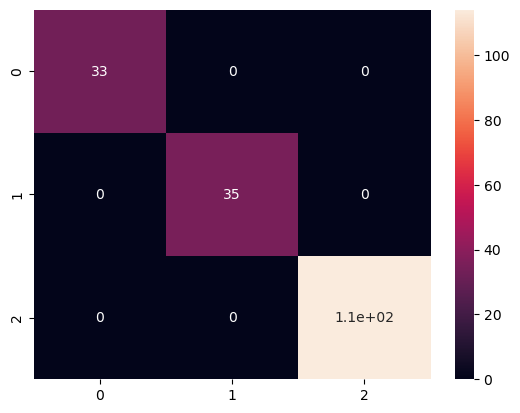

In [24]:
c= confusion_matrix(y_pred_train, y_train)
sns.heatmap(c, annot=True)

<AxesSubplot:>

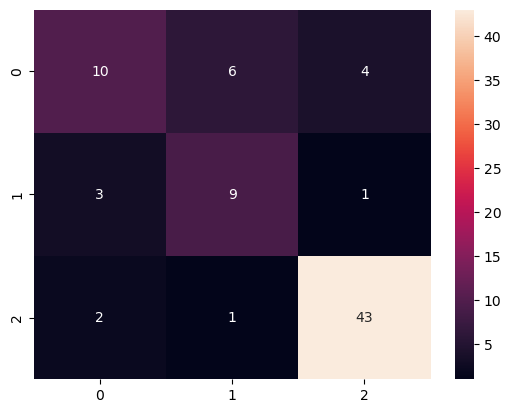

In [25]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)

## Total Run-Time

In [26]:
end=time()
total_time=end-start
minute=int(total_time/60)
second=total_time%60
if minute>=60:
    hour=int(minute/60)
    minute=minute%60
    print('Total execution time is : {}'.format(total_time))
    print(f"Which translates to: {hour} hours {minute} minutes and {second:.3f} seconds.")
else:
    print('Total execution time is : {}'.format(total_time))
    print(f"Which translates to: {minute} minutes and {second:.3f} seconds.")

Total execution time is : 17.517961025238037
Which translates to: 0 minutes and 17.518 seconds.


## Conclusions and Findings

1) The evaluation results show that the 'RandomForestClassifier': {'max_depth': 80, 'max_features': 2, 'n_estimators': 100} gives the best result for the given data set.

2) This small dataset doesn't take much time to compile and thus RandomForestClassifier just fine as other classifiers compared here. But for a big database GradientBoostingClassifier is much better in terms of result. But it takes a lot of time. So even in big database RandomForestClassifier can be a better choice as it gives good enough results but in a much shorter time.